In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
import io
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(df.head(5))

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [3]:
df.shape


(1470, 35)

In [4]:
df.dtypes



Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
df.duplicated().sum() #check if there are any duplication of values

0

In [6]:
df.isnull().sum() #check if there are any null records

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Correlation between inputs

In [7]:
'''
Good reference:https://www.linkedin.com/pulse/ibm-hr-analytics-understanding-employee-data-christy/
'''
''' First corrlation must be studied between all the factors know how strong is the linear relationship between the variable
'''
import scipy.stats
numerical=df.select_dtypes(exclude=['object'])
corr_matrix=np.corrcoef(numerical)
corr_matrix



array([[1.        , 0.99445493, 0.84865156, ..., 0.79901292, 0.98555559,
        0.97682323],
       [0.99445493, 1.        , 0.79149658, ..., 0.74420459, 0.97141694,
        0.96162945],
       [0.84865156, 0.79149658, 1.        , ..., 0.87180545, 0.87310218,
        0.86682421],
       ...,
       [0.79901292, 0.74420459, 0.87180545, ..., 1.        , 0.87074307,
        0.88532807],
       [0.98555559, 0.97141694, 0.87310218, ..., 0.87074307, 1.        ,
        0.99878963],
       [0.97682323, 0.96162945, 0.86682421, ..., 0.88532807, 0.99878963,
        1.        ]])

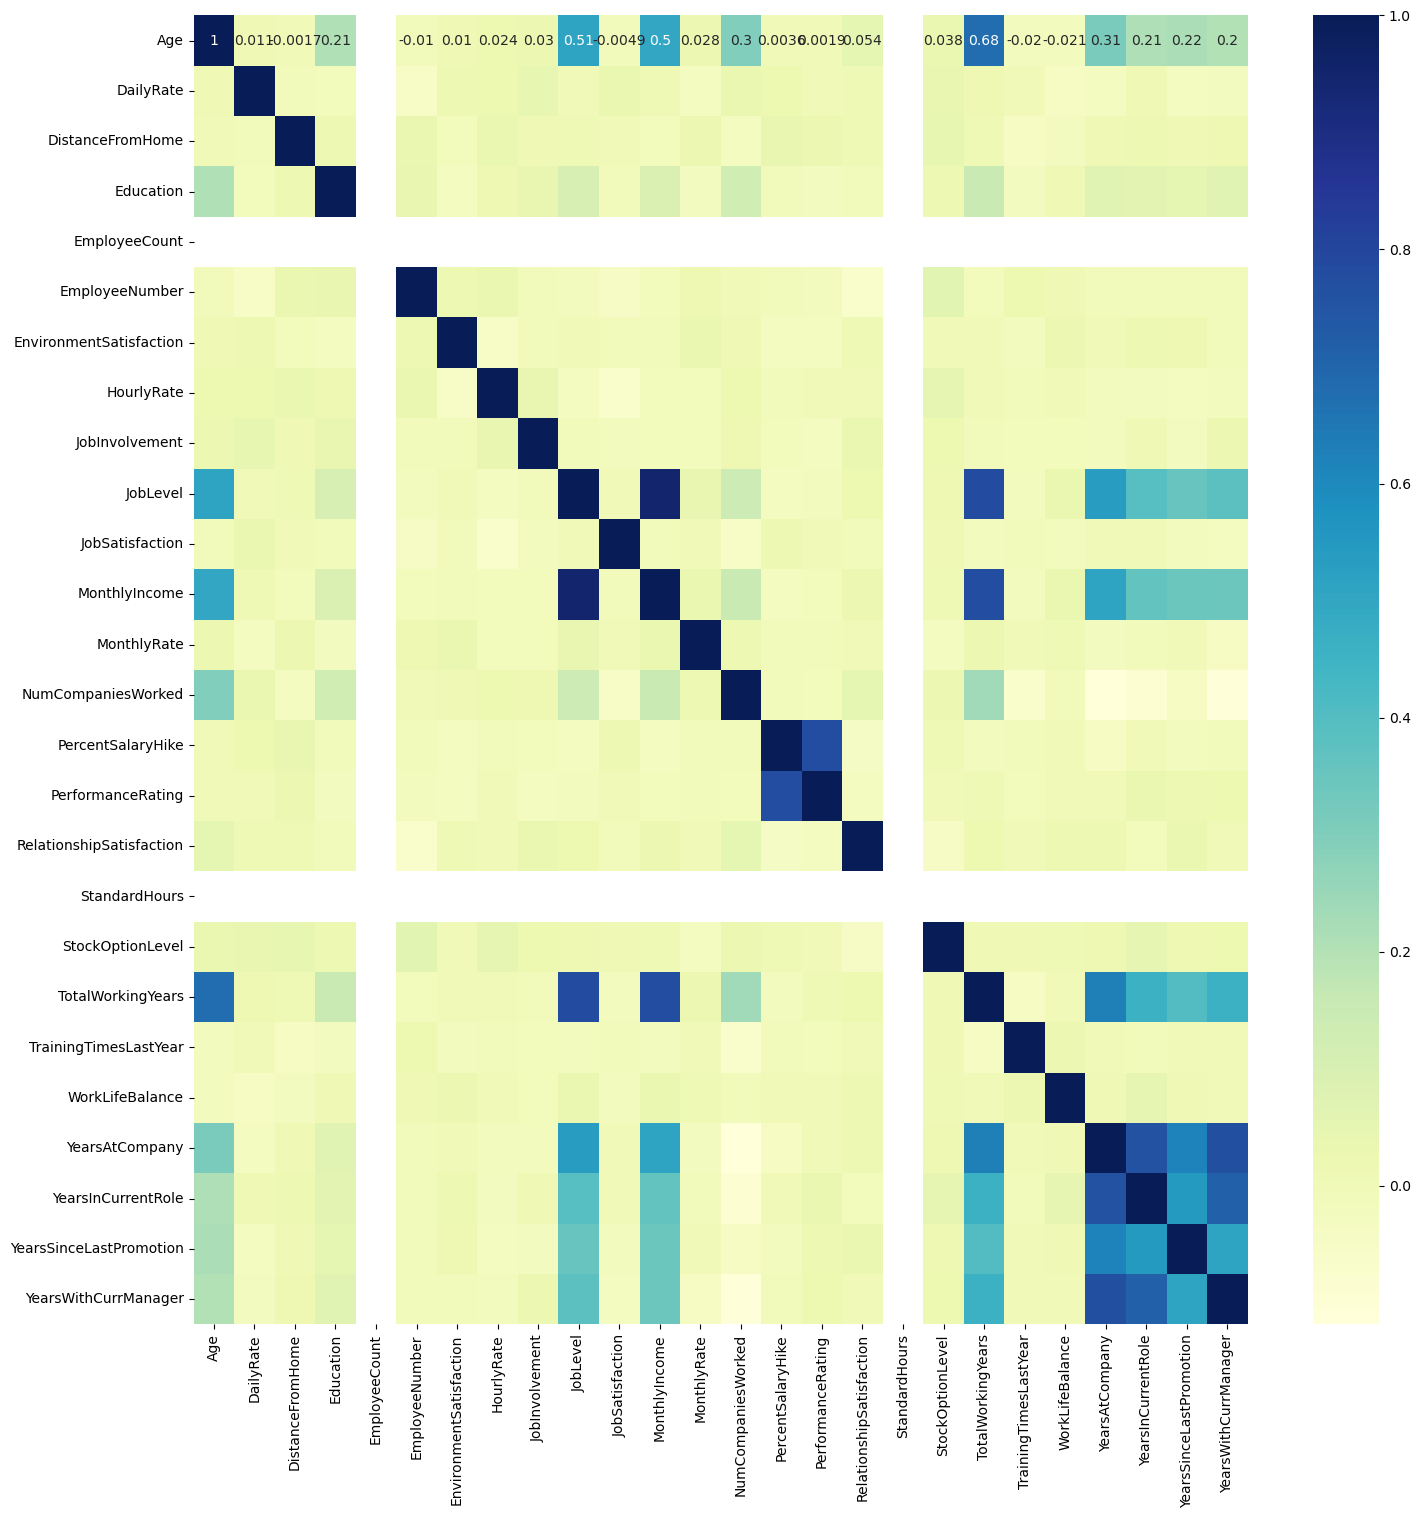

In [8]:
fig, ax = plt.subplots(figsize=(17, 17))
dataplot = sns.heatmap(numerical.corr(), cmap="YlGnBu", annot=True)

<Axes: xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

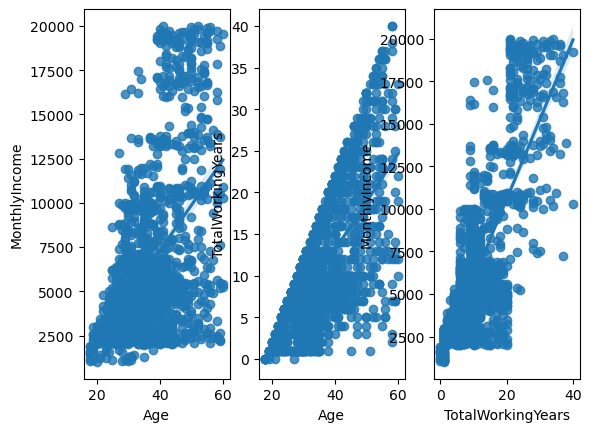

In [9]:
''' Visualizing the correlation of the three variables that are correlated with each other age as the age increases monthly income increase moreover
age is having a strong correlation with total working years. Finally monthly income with the total working years'''
fig, axs = plt.subplots(ncols=3)
sns.regplot(data=numerical,x='Age',y='MonthlyIncome',ax=axs[0])
sns.regplot(data=numerical,x='Age',y='TotalWorkingYears',ax=axs[1])
sns.regplot(data=numerical,x='TotalWorkingYears',y='MonthlyIncome',ax=axs[2])

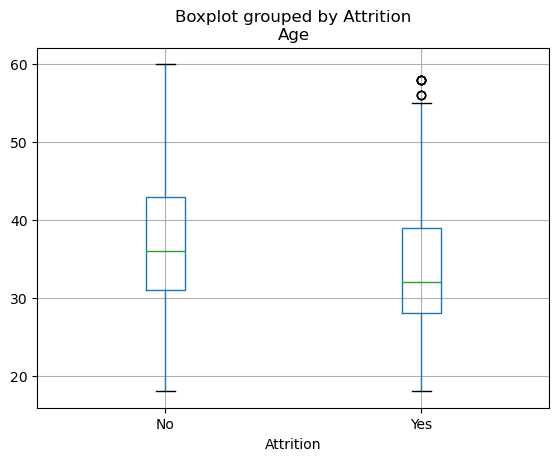

In [10]:
# Exploratory Data Analysis
''' Referencegood tutroial about the T-test ,https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests '''
''' Continuing with the previous section the three varaibles would a relationship between them and the Attrition column(hypothesis testing)'''
''' age and attrition box plot to see the outliers of the age column'''

data=df.boxplot(column=['Age'] ,by='Attrition') # Very few outliers which means that t-test can be executed by the mean





**Age vs Attrition**

In [11]:
from scipy import stats
data=df['Attrition'].value_counts()
data_frame_age=df[["Age", "Attrition"]]
yes_data_age=data_frame_age.loc[data_frame_age["Attrition"] =='Yes', ['Age']]
no_data_age=data_frame_age.loc[data_frame_age["Attrition"] =='No', ['Age']]
t_stat, p_val = stats.ttest_ind(yes_data_age, no_data_age)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))
print('The mean of the laid-off'+str(np.mean(yes_data_age)))
print('The mean of the worker who is not laid off'+str(np.mean(no_data_age)))
'The two results of  :t_stat, p_val rejected the null hypothesis and the mean value has confirmed that the  age isnot affecting the laid of'



t-statistic = [-6.17866384]
p-value = [8.35630802e-10]
The mean of the laid-off33.607594936708864
The mean of the worker who is not laid off37.561232765612324


'The two results of  :t_stat, p_val rejected the null hypothesis and the mean value has confirmed that the  age isnot affecting the laid of'

**Monthly_income vs Attrition**

t-statistic = [-6.20393577]
p-value = [7.14736399e-10]
The mean of the laid-off4787.0928270042195
The mean of the worker who is not laid off6832.739659367397


' The output has stated that still the monthly_income is not the same reason of the attrition percentage as the null hypothesis is rejected'

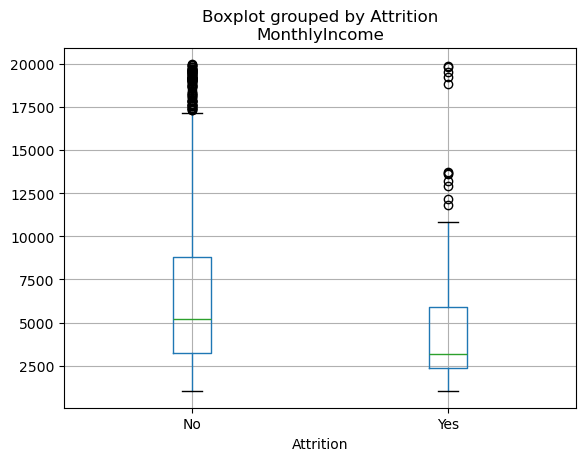

In [12]:
data_monthly_income=df.boxplot(column=['MonthlyIncome'] ,by='Attrition') #This data has a quiet many outliers which might effect the hypothesis testing
data_frame_monthly_income=df[['MonthlyIncome','Attrition']]
yes_data_monthly_income=data_frame_monthly_income.loc[data_frame_monthly_income["Attrition"] =='Yes', ['MonthlyIncome']]
no_data_monthly_income=data_frame_monthly_income.loc[data_frame_monthly_income["Attrition"] =='No', ['MonthlyIncome']]
t_stat, p_val = stats.ttest_ind(yes_data_monthly_income, no_data_monthly_income)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))
print('The mean of the laid-off'+str(np.mean(yes_data_monthly_income)))
print('The mean of the worker who is not laid off'+str(np.mean(no_data_monthly_income)))
''' The output has stated that still the monthly_income is not the same reason of the attrition percentage as the null hypothesis is rejected'''





Machine Learning Modeling


In [13]:
'''
First Model the random forest model is selected as  An ensemble learning method that combines
the output of multiple decision trees having a higher accuracy in a tree based models
'''

from sklearn.model_selection import train_test_split
#set seed for reproducability
SEED=1
categorical = df.select_dtypes(include = 'object')
final_cat=pd.get_dummies(categorical) #Tree-based model doesnot accept string
X = pd.concat([numerical,final_cat], axis=1)
y=df['Attrition']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=SEED)



Random Forrest Implementation


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier(n_estimators=400,min_samples_leaf=0.12,random_state=SEED)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8253968253968254


Logistic regression Implementation

In [15]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [16]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[357,   7],
       [ 71,   6]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

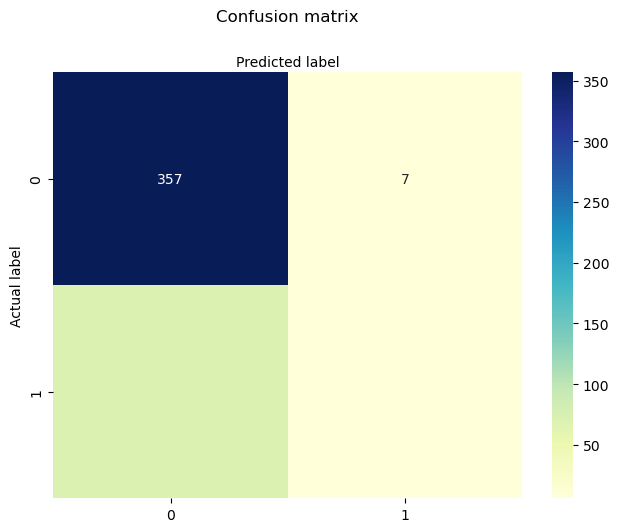

In [17]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



In [18]:
from sklearn.metrics import classification_report
target_names = ['positive Attrition', 'Negative Attrition']
print(classification_report(y_test, y_pred, target_names=target_names))

                    precision    recall  f1-score   support

positive Attrition       0.83      0.98      0.90       364
Negative Attrition       0.46      0.08      0.13        77

          accuracy                           0.82       441
         macro avg       0.65      0.53      0.52       441
      weighted avg       0.77      0.82      0.77       441



Inspecting the hyperparameters of a CART in sklearn

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
SEED = 1
dt = DecisionTreeClassifier(random_state=SEED)
print(dt.get_params())
params_dt={
    'max_depth':[3,4,5,6],
    'min_samples_leaf':[0.04,0.06,0.08],
    'max_features':[0.2,0.4,0.6,0.8]
}
grid_dt=GridSearchCV(estimator=dt,param_grid=params_dt,scoring='accuracy',cv=10,n_jobs=-1)
grid_dt.fit(X_train,y_train)
best_hyperparams=grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)






{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}
Best hyerparameters:
 {'max_depth': 3, 'max_features': 0.6, 'min_samples_leaf': 0.04}


In [20]:
best_cv_score=grid_dt.best_score_
print(best_cv_score)

1.0


In [21]:
best_model=grid_dt.best_estimator_
test_acc=best_model.score(X_test,y_test)
print("Test set accuracy of best model: {:.3f}"
.format(test_acc))



Test set accuracy of best model: 1.000
